https://blog.csdn.net/Cream_Cicilian/article/details/105524521

In [2]:
import numpy as np
import cv2
from PIL import Image
import skimage
import matplotlib.pyplot as plt

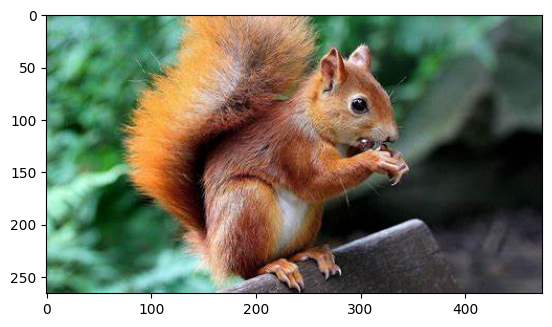

In [3]:
image = cv2.imread("../images/squirrel.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

# Canny 边缘检测

Canny - 高低阈值输出二值图像

T1， T2为阈值，凡是高于T2的都保留，凡是小于T1都丢弃，从高于T2的像素出发，凡是大于T1而且相互连接的，都保留。最终得到一个输出二值图像。

推荐的高低阈值比值为 T2: T1 = 3:1/2:1其中T2为高阈值，T1为低阈值

注意： 边缘检测无法检测图片的边缘,要检测图片边缘可以使用 copyMakeBorder 添加黑边

Canny 边缘检测算法是一种非常流行的边缘检测算法，是 John F. Canny 于 1986年提出的，被认为是最优的边缘检测算法。

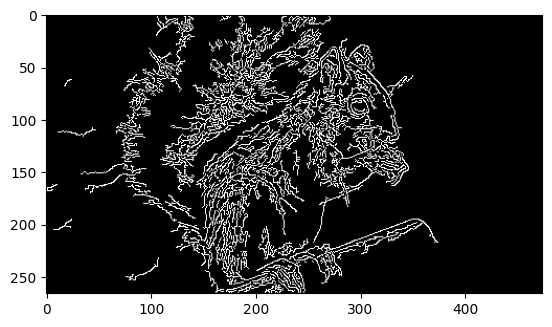

In [4]:
c = cv2.Canny(
    image=image,
    threshold1=85,
    threshold2=255,
    L2gradient=False,
)
plt.imshow(c, cmap="gray")

# skimage.feature.canny

仅支持单通道图像

(266, 474)


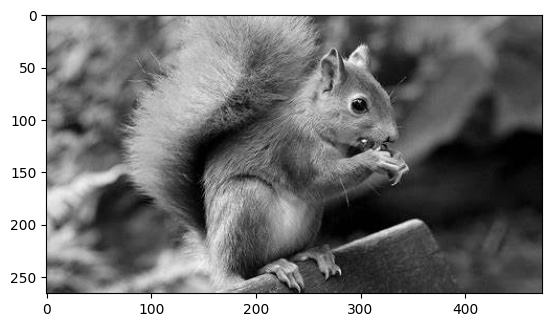

In [5]:
image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
print(image_gray.shape)
plt.imshow(image_gray, cmap="gray")

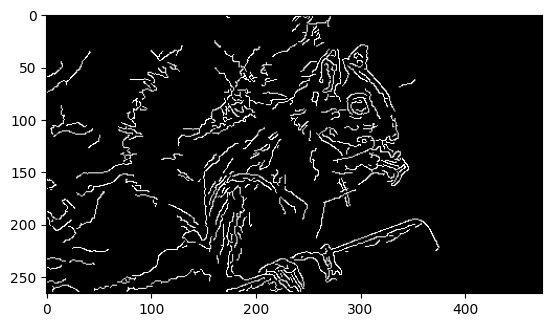

In [11]:
sc = skimage.feature.canny(
    image=image_gray,
    sigma=1,
    low_threshold=50,
    high_threshold=100,
)
plt.imshow(sc, cmap="gray")

# skimage.segmentation.find_boundaries

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


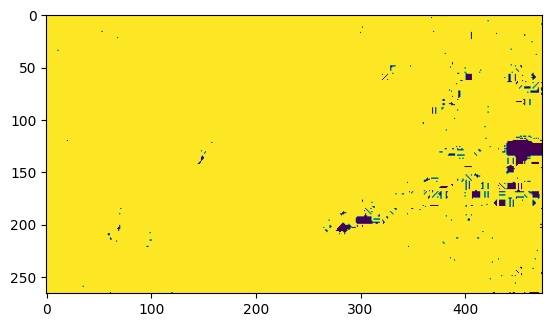

In [7]:
# 不能找彩色图像,找的是int和bool图像
b = skimage.segmentation.find_boundaries(
    label_img=image_gray,
    connectivity=1,
    mode="outer"
)
print(b)
plt.imshow(b)